# Covid Data

This uses a covid dataset for Alberta, Canada

I'm just messing around with it so that I can learn data wrangling techniques in python. Maybe I'll do some classification problems but idk

Currently uses pandas, numpy, matplotlib...yeah

In [37]:
import pandas as pd
from datetime import datetime
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [38]:
cov = pd.read_csv('data/alberta0522.csv')
vac = pd.read_csv('data/vac0522.csv')

In [39]:
cov.columns

Index(['Unnamed: 0', 'Date reported', 'Alberta Health Services Zone', 'Gender',
       'Age group', 'Case status', 'Case type'],
      dtype='object')

In [40]:
# Drop the built-in index column
cov = cov.drop(['Unnamed: 0'], axis=1)

In [41]:
cov['Date reported'].head()

0    2020-11-13
1    2021-01-03
2    2021-04-21
3    2021-05-17
4    2020-12-13
Name: Date reported, dtype: object

In [42]:
cov['Date reported'] = pd.to_datetime(cov['Date reported'], format='%Y-%m-%d')

In [43]:
cov.head()

,Date reported,Alberta Health Services Zone,Gender,Age group,Case status,Case type
0,2020-11-13,Calgary Zone,Female,1-4 years,Recovered,Confirmed
1,2021-01-03,Calgary Zone,Female,5-9 years,Recovered,Confirmed
2,2021-04-21,Edmonton Zone,Male,30-39 years,Recovered,Confirmed
3,2021-05-17,North Zone,Male,10-19 years,Active,Confirmed
4,2020-12-13,Edmonton Zone,Male,5-9 years,Recovered,Confirmed


In [44]:
cov['Case type'].value_counts()

Confirmed    221804
Probable       2391
Name: Case type, dtype: int64

In [45]:
# bad variable names but its ok
a = cov.resample('W', on='Date reported').count().cumsum()

In [46]:
b = cov.resample('2W', on='Date reported').count()

In [47]:
a = a['Case type']

In [48]:
b = b['Case type']
b.head()

Date reported
2020-03-08       1
2020-03-22     291
2020-04-05     986
2020-04-19    1422
2020-05-03    2941
Freq: 2W-SUN, Name: Case type, dtype: int64

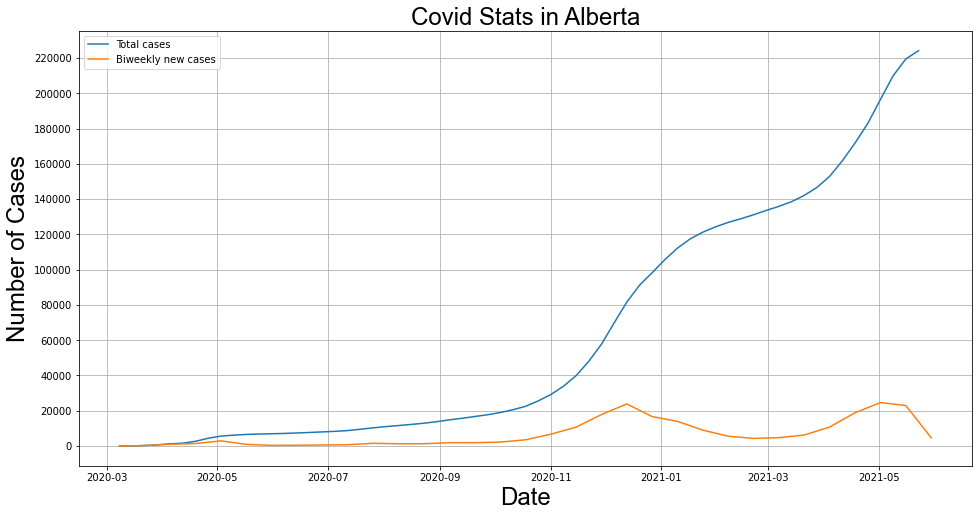

In [52]:
# Time to plot data. This is basically the covid data found at 
# https://www.alberta.ca/stats/covid-19-alberta-statistics.htm#total-cases

# However, it looks kind of weird because I simply plotted biweekly new cases,
# assuming patients would recover in two weeks, instead of "active cases"
# In the dataset, active cases are updated to "recovered" when a person recovers, so I can't really
# emulate the plot they have I think.

# uncomment this if u think ur funny
# plt.xkcd()

# get the subplots
f, ax = plt.subplots(figsize=(16, 8))

# plot data
totalcaseline, = ax.plot(a)
newcaseline, = ax.plot(b)

# title
fonts = [{'fontname':'Comic Sans MS', 'size': 24}, {'fontname':'Arial', 'size': 24}]
csfont = fonts[1]
plt.title('Covid Stats in Alberta', fontdict=csfont)
plt.xlabel('Date', fontdict=csfont)
plt.ylabel('Number of Cases', fontdict=csfont)

# legend stuff
totalcaseline.set_label('Total cases')
newcaseline.set_label('Biweekly new cases')
ax.legend()

plt.yticks(np.arange(0, 230000, step=20000))
plt.grid()
plt.show()

In [53]:
b.max()

24655

In [54]:
cov['Case status'].value_counts()
# yeah that's around the active cases on this day. I can't completely emulate their graph but it's fine.

Recovered    207486
Active        14533
Died           2176
Name: Case status, dtype: int64

## BUT IMAGINE IF WE MADE A CLASSIFIER TO SEE WHO DIED LOMG SOUNDS COOL
### I'll definitely try this in the future, but I'll look at the data some more and then the vaccine data first.

In [66]:
# group by age, select one column cuz why not
gender_distr = cov.groupby(['Age group']).count()['Gender']
gender_distr = pd.DataFrame(gender_distr.reset_index())
gender_distr.columns = ['Age group', 'Count']
gender_distr

,Age group,Count
0,1-4 years,8283
1,10-19 years,30131
2,20-29 years,40648
3,30-39 years,42662
4,40-49 years,35383
5,5-9 years,11592
6,50-59 years,26294
7,60-69 years,15138
8,70-79 years,6466
9,80+ years,6185


In [69]:
# stackoverflow code ayyy
age_list = ['Under 1 year', '1-4 years', '5-9 years', '10-19 years', '20-29 years', '30-39 years', '40-49 years', 
            '50-59 years', '60-69 years', '70-79 years', '80+ years', 'Unknown']
gender_distr['Age group'] = pd.Categorical(gender_distr['Age group'], age_list)
gender_distr = gender_distr.sort_values('Age group')

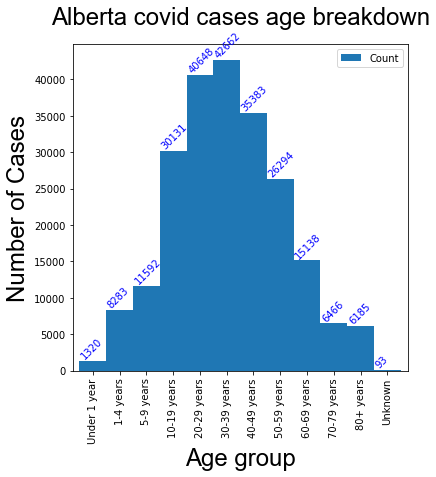

In [125]:
ax = gender_distr.plot.bar('Age group', y='Count', width=1.0)
f = plt.gcf()
f.set_size_inches(6, 6)

# stackoverflow code ayyy
for i, v in enumerate(gender_distr['Count']):
    ax.text(i-0.5, v+300, str(v), color='blue', fontweight='regular', rotation=45)

# styling
plt.title('Alberta covid cases age breakdown', fontdict=csfont, pad=20.0)
plt.xlabel('Age group', fontdict=csfont)
plt.ylabel('Number of Cases', fontdict=csfont)
plt.show()
# ayy we plotted the distribution!! how cool.
# doesn't look REALLY good, but we got a lot of features, which is good.